# KI-gestützte Bilderkennung zur automatisierten Müllklassifizierung und Trennhilfe

**Modul:** Selected Topics of AI <br>
**Professor:** Prof. Dr. Johannes Maucher <br>
**Bearbeitet von:** Lars Gerigk (lg107), Julia Ebert (je073), Joel Starkov (js486) <br>
**Abgabe:** 28.01.2026 <br>

## Inhaltsverzeichnis 

1. Problemstellung und Zielsetzung<br>

    1.1. Motivation und Problemanalyse <br>
    1.2. Ziel <br>
    1.3. Abgrenzung der Müllkategorien <br>
    
2. Installation und Import
10. Quellen

<br>

---

### 1. Problemstellung und Zielsetzung
#### 1.1. Motivation und Problemanalyse <a id="motivation"></a>

Die korrekte Trennung von Abfällen stellt für viele eine Herausforderung dar. Eine Umfrage von ALBA und Civey aus dem Jahr 2022 zeigt, dass nur 3,8% der Befragten Teilnehmer aus einer Stichprobengröße von 2.502 Menschen ihren Müll nicht trennen. Besonders hervorsticht, dass über 90% der Befragten, darauf achten Papier und Pappe vom Restmüll zu trennen. 87,3 % der Befragten trennen ihre Plastik(-verpackungen) vom Restmüll und 83,8 % trennen ihr Altglas vom Restmüll. Mit 64,4 % Müll trennen die Befragten am wenigsten von Biomüll und Restmüll. Diese Ergebnisse hören sich zunächst vielversprechend an. Allerdings täsuchen diese Ergebnisse, so der ALBA-Chef Eric Schweitzer. Eine Stude des Umweltbundesamtes zeigt auf, dass zwei Drittel des Inhalts der Restmülltonne, getrennt gesammelt und recycelt werden könnte. Zudem sagt Schweitzer aus, dass "Fehlerwürfe" von bis zu 30 Prozent keine Seltenheit ist. Somit werden Ressourcen folglich verbrannt, die die Gesamtkosten für Energie und die Produktion neuer Rohstoffe steigen für die Gesellschaft [1]. 

Fehlwürfe in der Mülltrennung lassen sich unter anderem auf ein fehlendes grundlegendes Verständnis des Abfalltrennungssystems sowie auf eine unzureichende und nicht einheitliche Aufklärung zurückführen. Die bestehenden Trennregeln sind teilweise komplex und unterscheiden sich je nach Region, was die korrekte Zuordnung einzelner Abfallarten erschwert. Durch die entstandenen Unsicherheiten führen in der Praxis zu erhöhten Fehlwürfen und beeinträchtigen die Effizienz von Recyclingprozessen [2].

Im Folgenden wird ein Anwendungsbeispiel für den Einsatz eines bildbasierten Klassifikationssystems an der Hochschule der Medien (kurz: HdM) vorgestellt. Ziel ist es, die Mülltrennung und damit die Recyclingqualität auf dem Campus zu verbessern. Zu diesem Zweck wird ein Image Classifier entwickelt, der anhand eines aufgenommenen Bildes eines Abfallobjekts dessen Kategorie erkennt und den Nutzer bei der korrekten Entsorgung unterstützt.

Ein möglicher Ausblick besteht darin, Abfallbehälter mit einer integrierten Kamera sowie einem visuellen und auditiven Rückmeldesystem auszustatten. Nach der automatischen Klassifikation gibt das System an der jeweiligen Einwurföffnung ein Signal aus, das anzeigt, in welchen Behälter der Abfall entsorgt werden soll. Durch die Kombination aus visueller und auditiver Rückmeldung kann die Bedienung vereinfacht und gleichzeitig sprachliche sowie visuelle Barrieren reduziert werden. Auf diese Weise könnte das System dazu beitragen, Fehlwürfe zu verringern und die Mülltrennung im Hochschulalltag nachhaltig zu verbessern.


### 1.2. Ziel 

Ziel dieses Projekts ist die Entwicklung eines Image Classifiers zur automatisierten Erkennung und Zuordnung von Abfallobjekten. Hierfür werden parallel zu den in der Vorlesung behandelten Konzepten und Modellen geeignete Architekturen ausgewählt, implementiert und an die Anforderungen des vorliegenden Anwendungsfalls angepasst. Die entwickelten Modelle werden trainiert, validiert und hinsichtlich ihrer Leistungsfähigkeit systematisch untersucht.

Zur Bewertung der Modellgüte werden etablierte Metriken wie Accuracy, Precision, Recall und F1 Score herangezogen. Die Ergebnisse der einzelnen Modellvarianten werden anschließend miteinander verglichen, um den Einfluss unterschiedlicher Architekturen, Trainingsstrategien und Hyperparameter auf die Klassifikationsleistung zu analysieren. Auf diese Weise soll ein Modell identifiziert werden, das für die automatisierte Müllklassifikation eine hohe Erkennungsleistung sowie eine robuste Generalisierungsfähigkeit aufweist.

Ziel der Vorgehensweise ist es, durch strukturierte Umsetzung, fundierte Evaluation und gezielte Anpassung der Modellarchitektur ein Klassifikationsmodell zu entwickeln, das einen Beitrag zur Reduktion von Fehlwürfen in der Mülltrennung leisten kann.

### 1.3. Abgrenzung der Müllkategorien 

<b>Hinweis:</b> Wir wollen uns bewusst auf den typischen Müll beschränken, der im Alltag an der Hochschule der Medien anfällt. Daher beziehen wir bei der Klassifikation an der HdM vorhandenen Entsorgungsmöglichkeiten. 

<b>Unser Modell klassifiziert erkannte Objekte in eine der folgenden fünf Kategorien:</b>

<table style="width:100%; border-collapse: collapse; margin-right:20px;">
  <tr>
    <th>Kategorie</th>
    <th>Beschreibung</th>
  </tr>

  <tr>
    <td>Pfand</td>
    <td>
      Diese Kategorie umfasst pfandpflichtige Getränkeverpackungen. Dazu zählen insbesondere:
      <ul>
        <li>Einweg Plastikflaschen</li>
        <li>Sowohl mit als auch ohne sichtbare Pfandkennzeichnung</li>
        <li>Auf Grund begrenzter Verfügbarkeit geeigneter Trainingsdaten werden zusätzlich Bilder aus Ländern ohne Pfandsystem verwendet</li>
        <li>Getränkedosen</li>
      </ul>
      Glasflaschen werden bewusst nicht dieser Kategorie zugeordnet, obwohl sie ebenfalls pfandpflichtig sein können. 
      Der Grund hierfür liegt darin, dass Glasflaschen an der Hochschule der Medien nicht über den klassischen Pfandbehälter entsorgt werden.
    </td>
  </tr>

  <tr>
    <td>Restmüll</td>
    <td>
      In diese Kategorie fallen Abfälle, die weder recycelbar sind noch einer anderen Kategorie eindeutig zugeordnet werden können. Beispiele sind:
      <ul>
        <li>Stark verschmutzte oder beschichtete Materialien</li>
        <li>Essensreste</li>
        <li>Nicht trennbare Verbundmaterialien</li>
      </ul>
    </td>
  </tr>

  <tr>
    <td>Papier</td>
    <td>
      Diese Kategorie umfasst saubere und trockene Papierprodukte, die für das Recycling geeignet sind. Dazu gehören:
      <ul>
        <li>Papierblätter und Hefte</li>
        <li>Kartonverpackungen ohne starke Verschmutzung</li>
        <li>Papiertüten</li>
      </ul>
      Nicht enthalten sind beschichtete oder stark verschmutzte Papiermaterialien, da diese nicht dem Papierrecycling zugeführt werden können.
    </td>
  </tr>

  <tr>
    <td>Verpackungen</td>
    <td>
      Diese Kategorie beinhaltet recycelbare Verpackungsmaterialien, zum Beispiel:
      <ul>
        <li>Kunststoffverpackungen von Lebensmitteln</li>
        <li>Joghurtbecher, Folien und Plastikschalen</li>
      </ul>
    </td>
  </tr>

  <tr>
    <td>Sonstiges</td>
    <td>
      Für diese Kategorie sind alle Objekte vorgesehen, die nicht zu den oben genannten Müllarten gehören oder an der Hochschule der Medien nicht im regulären Müll entsorgt werden dürfen.
      <ul>
        <li>Batterien und Elektroschrott</li>
        <li>Glasflaschen</li>
        <li>Gegenstände, die kein Müll sind, zum Beispiel Taschen, Bücher oder Technik</li>
      </ul>
    </td>
  </tr>
</table>

Daten 
-> sollten nicht optimal sein <br>
-> verschiedene Lichtverhältnisse, Hände im Bild, Graustufenbild vs Farbbild, 

### Installation und Import 

In diesem Abschnitt werden alle benötigten Bibliotheken installiert und importiert. Dadurch wird die Arbeitsumgebung vorbereitet, die für das Laden der Daten und das Training der Modelle erforderlich ist.

In [1]:
%pip install numpy
%pip install scipy
%pip install matplotlib
%pip install pandas
%pip install scikit-learn
%pip install torch
%pip install torchvision
%pip install wandb
%pip install torchsummary


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import os
import numpy as np
import scipy.io as io
import matplotlib.pyplot as plt
import pandas as pd

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import random_split, DataLoader


import torchvision
from torchvision import datasets, models, transforms
from torchsummary import summary

import wandb 

In [3]:
wandb.login()

wandb: Currently logged in as: joel-starkov (sltai) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


True

In [4]:
device = 'cuda' if torch.cuda.is_available() else 'mps' if torch.backends.mps.is_available() else 'cpu'
print(f'Using {device} device')

Using cuda device


In [5]:
random_seed = 23
torch.manual_seed(random_seed)

### Datensetanalyse

Für die Daten haben wir uns dafür entschieden ein Datenset von Kaggle zu verwenden hier die Daten von dem Datenset "Garbage Classification" von Mostafa Mohamed. Dieses ist unter dem folgenden Link zu finden: https://www.kaggle.com/datasets/mostafaabla/garbage-classification, entnommen am 23.12.2025. Um mit den Datensats besser verwenden zu können haben wir die Bilder manuell in unsere oben genannten Kategorien eingeteilt. 
Damit wir gleichverteilte Daten für unser Modell haben, haben wir zudem für die Klasse Pfand den Datensatz "Plastic Bottles in the wild Image Dataset" von Siddharth Sah vewendet. Das Datenset ist unter folgenden Link zu finden: https://www.kaggle.com/datasets/siddharthkumarsah/plastic-bottles-image-dataset, entnommen am 10.01.2025. 
Damit eine Gleichverteilung gewährleistet werden kann entnehmen wir aus jeder Datenquelle 2000 Bilder. 

Restmüll, Papier: https://www.kaggle.com/datasets/mostafaabla/garbage-classification <br>
Pfandflaschen:  https://www.kaggle.com/datasets/siddharthkumarsah/plastic-bottles-image-dataset

Kaffeebecher Url: 
https://www.kaggle.com/datasets/vencerlanz09/plastic-and-paper-cups-synthetic-image-dataset

Plastik 1:
https://www.kaggle.com/datasets/harshitkandoi7850/dataset-for-visual-plastic-type-recognition

Plastik 2:
https://www.kaggle.com/datasets/nandinibagga/plastic-images

Dosen:
https://www.kaggle.com/datasets/tarekyasser63/drinks-cans

- wir haben bilder die nicht zur Uni passen entfernt um auf 2000 zu kommen -> Scenario nicht passen
- Bilder aussortiert, Datensätze konnten wir nicht direkt so verwenden da es Pfandflaschen nur in Deutschland gibt

Zudem haben wir eigene Bilder gesammelt, die man dem Ordner xy entnehmen kann. 

Weights and Bias

### Datenaufbereitung
#### Import der Bilder

In [6]:
dataDir = "./Train-Data"

full_dataset = datasets.ImageFolder(
    root=dataDir
)

print(full_dataset)
print("Klassen: ", full_dataset.classes)


class_count = len(full_dataset.classes)
print("Anzahl Klassen: ", class_count) 

Dataset ImageFolder
    Number of datapoints: 10391
    Root location: ./Train-Data
Klassen:  ['other', 'paper', 'residual waste', 'returnable bottle', 'verpackungen']
Anzahl Klassen:  5


In [7]:
def count_classes(dataset):
    img_classes = {}
    class_names = dataset.classes

    for _, label in dataset:
        class_name = class_names[int(label)]

        if class_name not in img_classes:
            img_classes[class_name] = 0

        img_classes[class_name] += 1

    return img_classes


In [8]:
img_classes = count_classes(full_dataset)

In [9]:
def print_class_distribution(img_classes, title, xlabel, ylabel):
    plt.figure(figsize=(10,5))
    plt.bar(img_classes.keys(), img_classes.values())
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

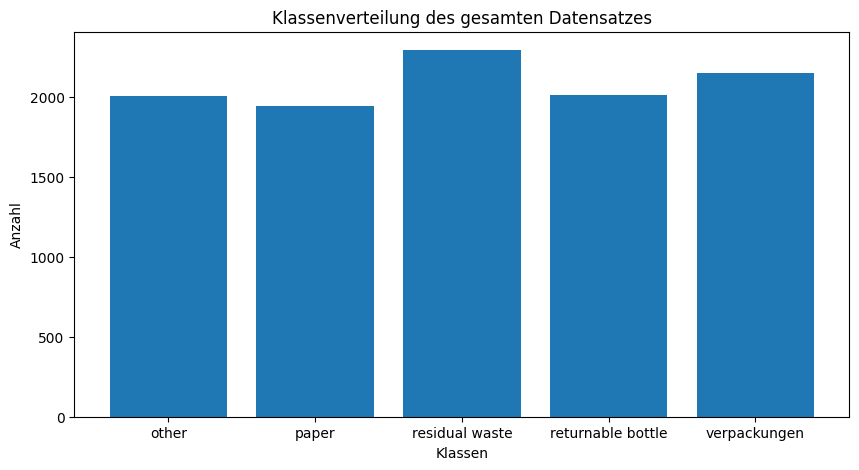

{'other': 2001, 'paper': 1941, 'residual waste': 2291, 'returnable bottle': 2013, 'verpackungen': 2145}


In [10]:
print_class_distribution(img_classes, title='Klassenverteilung des gesamten Datensatzes', xlabel='Klassen', ylabel='Anzahl')
print(img_classes)

#### Aufteilung der Daten in Trainings- und Testdaten 

In [11]:
from sklearn.utils import shuffle

trainRatio = 0.8
train_size = int(trainRatio * len(full_dataset))
test_size = len(full_dataset) - train_size

generator = torch.Generator().manual_seed(random_seed)

train_dataset, test_dataset = random_split(
    full_dataset,
    [train_size, test_size],
    generator=generator
)

In [12]:
print("Dataset Train: ", len(train_dataset))
print("Dataset Test: ", len(test_dataset))

Dataset Train:  8312
Dataset Test:  2079


In [12]:
count_classes_train = count_classes(train_dataset.dataset)
count_classes_test = count_classes(test_dataset.dataset)

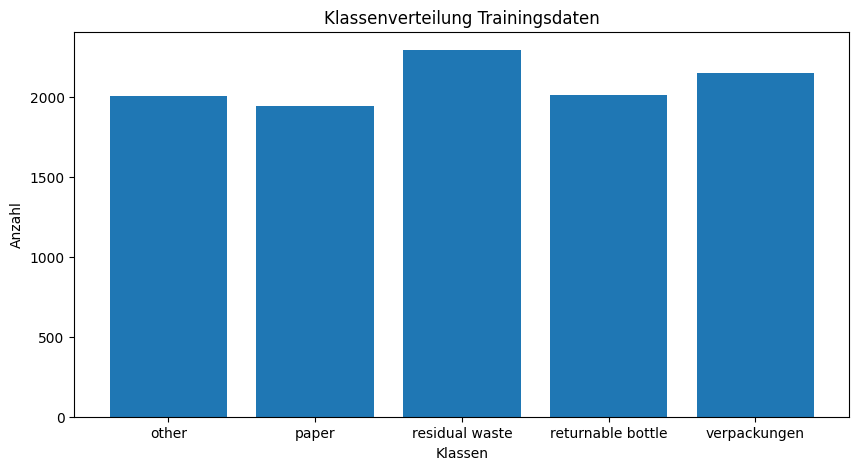

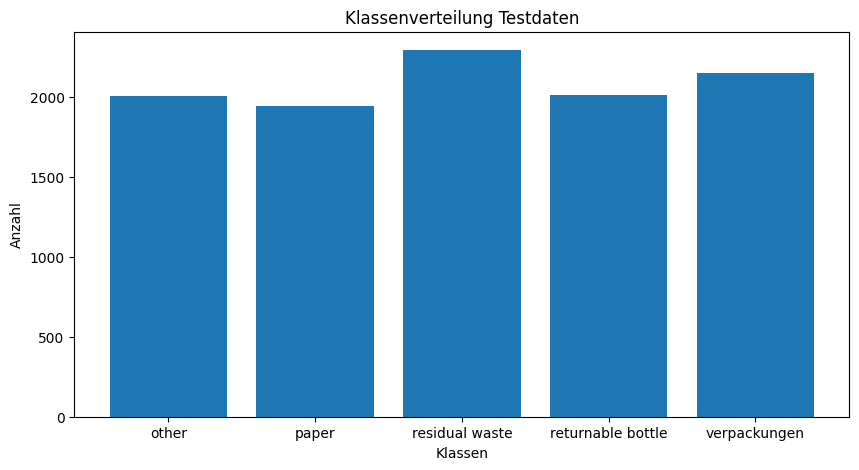

In [13]:
print_class_distribution(count_classes_train, title='Klassenverteilung Trainingsdaten', xlabel='Klassen', ylabel='Anzahl')
print_class_distribution(count_classes_test, title='Klassenverteilung Testdaten', xlabel='Klassen', ylabel='Anzahl')

!! funktion erstellen um immer 3 bilder pro Klasse zu printen 

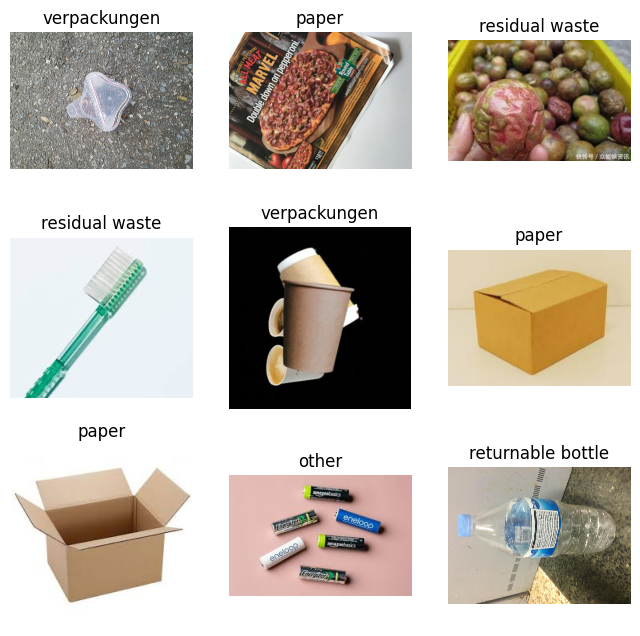

In [13]:
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
class_names = full_dataset.classes  

for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_dataset), size=(1,)).item()
    img, label = train_dataset[sample_idx]
    class_name = class_names[label]
    figure.add_subplot(rows, cols, i)
    plt.axis("off")
    plt.title(class_name)
    plt.imshow(img)
plt.show()

#### Transform Methoden für die Daten erstellen 

Alle Bilder in eine Größe bringen <br>
Drehen und verzerren etc. 
Ohne Farben arbeiten? 
Warum Resize? 
Warum CenterCrop? 

In [14]:
image_size = 32
channel = 3

transform_test = transforms.Compose([
    transforms.Resize((image_size, image_size)),
    transforms.CenterCrop((image_size)),
    transforms.ToTensor()
])

transform_train = transforms.Compose([
    transforms.Resize((image_size, image_size)),
    transforms.CenterCrop((image_size)),
    transforms.RandomRotation(degrees=(0, 360)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor()
])


In [15]:
# Transform Methoden auf das Dataset anwenden
train_dataset.dataset.transform = transform_train
test_dataset.dataset.transform = transform_test

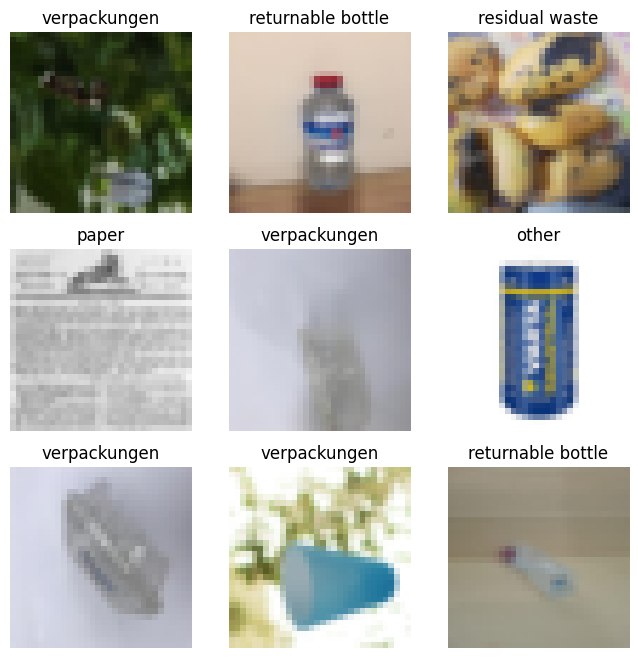

In [16]:
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
class_names = full_dataset.classes  

for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_dataset), size=(1,)).item()
    img, label = train_dataset[sample_idx]
    img = img.permute(1, 2, 0)
    class_name = class_names[label]
    figure.add_subplot(rows, cols, i)
    plt.axis("off")
    plt.title(class_name)
    plt.imshow(img, cmap="grey")
plt.show()

##### Dataloader erstellen

In [17]:
BS = 16

train_loader = DataLoader(
    train_dataset,
    batch_size=BS,
    shuffle=True, 
    num_workers=4
)

test_loader = DataLoader(
    test_dataset,
    batch_size=BS,
    shuffle=False,
    num_workers=4
)

In [18]:
imagebatch_train=next(iter(train_loader))

print("Shape: ", imagebatch_train[0].shape)
print("First image: ", imagebatch_train[1])
print("Batchsize: ", len(imagebatch_train[1]))

Shape:  torch.Size([16, 3, 32, 32])
First image:  tensor([1, 2, 3, 4, 4, 0, 3, 4, 4, 3, 4, 1, 0, 1, 3, 0])
Batchsize:  16


!!! printen

In [19]:
imagebatch_test=next(iter(test_loader))

print("Shape: ", imagebatch_test[0].shape)
print("First image: ", imagebatch_test[1])
print("Batchsize: ", len(imagebatch_test[1]))

Shape:  torch.Size([16, 3, 32, 32])
First image:  tensor([1, 3, 3, 1, 1, 2, 4, 0, 4, 0, 3, 3, 0, 1, 0, 0])
Batchsize:  16


!!! printen

## Architekturen definieren 

1. MLP 
3. CNN - Eigenen Feature Extractor und Classifier 
4. Komplexes CNN 
2. Transfer Learning <br>
    2.1. From scratch <br>
    2.2. Pretrained<br>
    2.3. Fine Tune <br>

### Multi Layer Perceptron 

In [29]:
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.d1 = nn.Linear(channel * image_size * image_size, 512)
        self.dropout = nn.Dropout(p=0.2)
        self.d2 = nn.Linear(512, class_count)
    
    def forward(self, x):
        x = x.flatten(start_dim = 1) #serialize 3dim input

        x = self.d1(x)
        x = torch.relu(x)
        x = self.dropout(x)

        raw_scores = self.d2(x)
        output_predictions = torch.softmax(raw_scores , dim=1)   

        return output_predictions 

In [30]:
model = MLP()
model = model.to(device)

images, labels = next(iter(train_loader)) 
images = images.to(device)
labels = labels.to(device)

print("batch size:", images.shape)

output_predictions = model(images)
output_predicted_label = torch.argmax(output_predictions, dim=1)

print(output_predictions)
print(output_predicted_label)

batch size: torch.Size([16, 3, 32, 32])
tensor([[0.1627, 0.2363, 0.2896, 0.1796, 0.1318],
        [0.1855, 0.2399, 0.2158, 0.1828, 0.1760],
        [0.1784, 0.2141, 0.2270, 0.2078, 0.1727],
        [0.1748, 0.2319, 0.2607, 0.1883, 0.1443],
        [0.1489, 0.2285, 0.2926, 0.2098, 0.1201],
        [0.1823, 0.2290, 0.2417, 0.1736, 0.1734],
        [0.1811, 0.2099, 0.2258, 0.2109, 0.1723],
        [0.1693, 0.2554, 0.2549, 0.1610, 0.1594],
        [0.1889, 0.2163, 0.2369, 0.1800, 0.1779],
        [0.1296, 0.2290, 0.3153, 0.1825, 0.1436],
        [0.1750, 0.2336, 0.2376, 0.1869, 0.1669],
        [0.1604, 0.2170, 0.2562, 0.1922, 0.1741],
        [0.1859, 0.2192, 0.2569, 0.1840, 0.1539],
        [0.1550, 0.2548, 0.3089, 0.1513, 0.1300],
        [0.1696, 0.2130, 0.2532, 0.1956, 0.1685],
        [0.1387, 0.2101, 0.3319, 0.1913, 0.1280]], grad_fn=<SoftmaxBackward0>)
tensor([2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2])


In [31]:
summary(model,input_size=(channel, image_size, image_size))
print("")

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 512]       1,573,376
           Dropout-2                  [-1, 512]               0
            Linear-3                    [-1, 5]           2,565
Total params: 1,575,941
Trainable params: 1,575,941
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/backward pass size (MB): 0.01
Params size (MB): 6.01
Estimated Total Size (MB): 6.03
----------------------------------------------------------------



#### Define Configurations using wandb

In [32]:
config_mlp = {
    "learning_rate": 0.1,
    "batch_size": BS,
    "epochs": 15,
    "architecture": "MLP",
    "image_size": image_size,
}

!!! Warum CrossEntropyLoss und SGD

In [33]:
model = MLP()
model = model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=config_mlp["learning_rate"])

#### Training
Now it’s time to train the model

!!! get_accuracy evtl in Utils

In [20]:
def get_accuracy(output, target, batch_size):
    ''' Obtain accuracy for training round '''
    prediction=torch.max(output, 1)[1].view(target.size())
    #prediction=torch.argmax(output, 1)
    corrects = (prediction.data == target.data).sum()
    accuracy = 100.0 * corrects / batch_size
    return accuracy.item()

In [35]:
train_accuracies = []
test_accuracies = []

train_losses = []
test_losses = []

wandb.init(
    project="Müll_Classification_MLP",
    config=config_mlp
)

for epoch in range(config_mlp["epochs"]):
    train_loss = 0.0
    train_accuracy = 0.0

    test_loss = 0.0
    test_accuracy = 0.0

    for i, (images, labels) in enumerate(train_loader): 
        model.train()

        images = images.to(device)
        labels = labels.to(device)

        predictions = model(images)
        loss = criterion(predictions, labels)
        optimizer.zero_grad()
        loss.backward()

        optimizer.step()

        train_loss += loss.detach().item()
        train_accuracy += get_accuracy(predictions, labels, config_mlp["batch_size"])

    train_accuracy = train_accuracy / i # Warum in den Folien acc_train=train_acc/i   und i ist 1 kleiner als len(train_loader) ?
    train_accuracies.append(train_accuracy)

    train_loss = train_loss / i
    train_losses.append(train_loss)

    for i, (images, labels) in enumerate(test_loader):
        model.eval()

        images = images.to(device)
        labels = labels.to(device)

        predictions = model(images)
        loss = criterion(predictions, labels)

        test_loss += loss.detach().item()
        test_accuracy += get_accuracy(predictions, labels, config_mlp["batch_size"])

    test_accuracy = test_accuracy / i
    test_accuracies.append(test_accuracy)

    test_loss = test_loss / i
    test_losses.append(test_loss)

    print(f"Epoch {epoch+1}/{config_mlp['epochs']}, "
          f"Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.2f}%, "
          f"Test Loss: {test_loss:.4f}, Test Acc: {test_accuracy:.2f}%")
    
    wandb.log({
        "Train Loss": train_loss,
        "Train Accuracy": train_accuracy,   
        "Test Loss": test_loss,
        "Test Accuracy": test_accuracy
    }) 

Epoch 1/15, Train Loss: 1.5650, Train Acc: 30.25%, Test Loss: 1.5605, Test Acc: 31.01%
Epoch 2/15, Train Loss: 1.5250, Train Acc: 35.50%, Test Loss: 1.5525, Test Acc: 34.79%
Epoch 3/15, Train Loss: 1.5089, Train Acc: 37.64%, Test Loss: 1.6093, Test Acc: 29.51%
Epoch 4/15, Train Loss: 1.5035, Train Acc: 38.14%, Test Loss: 1.5500, Test Acc: 34.59%
Epoch 5/15, Train Loss: 1.4917, Train Acc: 39.61%, Test Loss: 1.4973, Test Acc: 40.46%
Epoch 6/15, Train Loss: 1.4828, Train Acc: 40.34%, Test Loss: 1.5366, Test Acc: 36.48%
Epoch 7/15, Train Loss: 1.4756, Train Acc: 41.53%, Test Loss: 1.5440, Test Acc: 36.34%
Epoch 8/15, Train Loss: 1.4697, Train Acc: 42.11%, Test Loss: 1.5127, Test Acc: 37.60%
Epoch 9/15, Train Loss: 1.4647, Train Acc: 42.67%, Test Loss: 1.4962, Test Acc: 40.41%
Epoch 10/15, Train Loss: 1.4586, Train Acc: 43.14%, Test Loss: 1.4835, Test Acc: 41.47%
Epoch 11/15, Train Loss: 1.4572, Train Acc: 43.27%, Test Loss: 1.5362, Test Acc: 37.06%
Epoch 12/15, Train Loss: 1.4520, Train Ac

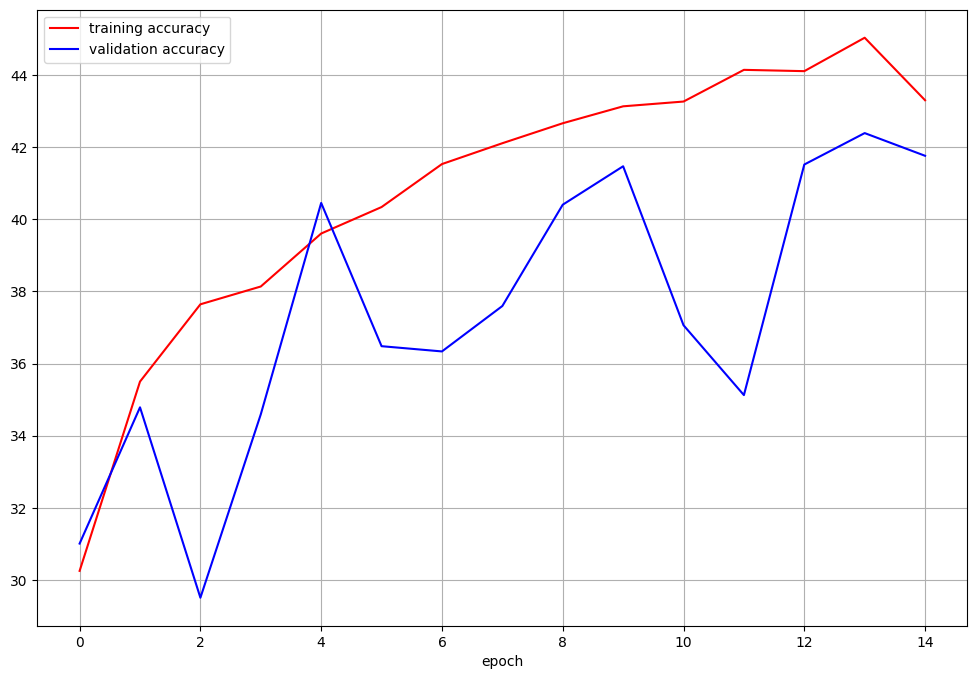

In [36]:
plt.figure(figsize=(12,8))
plt.plot(range(config_mlp["epochs"]),train_accuracies,"r",label="training accuracy")
plt.plot(range(config_mlp["epochs"]),test_accuracies,"b",label="validation accuracy")
plt.xlabel("epoch")
plt.grid(True)
plt.legend()
plt.show()

#### CNN

In [37]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=channel, out_channels=32, kernel_size=3, stride=1, padding=1) # Out channel woher ????
        self.dropout = nn.Dropout(p=0.2)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=32, kernel_size=3, stride=1, padding=1)
        self.dropout = nn.Dropout(p=0.2)
        self.fc1 = nn.Linear(2048, 128)
        self.dropout = nn.Dropout(p=0.2)
        self.fc2 = nn.Linear(128, 64)
        self.dropout = nn.Dropout(p=0.2)
        self.fc3 = nn.Linear(64, class_count)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [22]:
net = Net().to(device)
summary(net, input_size=(channel, image_size, image_size), device="cuda")

NameError: name 'Net' is not defined

In [39]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.5,)

In [40]:
num_epochs=30
train_acc_list=[]
test_acc_list=[]
## train the model
for epoch in range(num_epochs):
    train_running_loss = 0.0
    train_acc = 0.0
    test_running_loss = 0.0
    test_acc = 0.0

    ## commence training
    #model = model.train()

    ## training step
    for i, (images, labels) in enumerate(train_loader):
        net.train()
        images = images.to(device)
        labels = labels.to(device)

        ## forward + backprop + loss
        predictions = net(images)
        loss = criterion(predictions, labels)
        optimizer.zero_grad()
        loss.backward()

        ## update model params
        optimizer.step()

        train_running_loss += loss.detach().item()
        train_acc += get_accuracy(predictions, labels, BS)
    
    #print(i,train_acc)
    acc_train=train_acc/i
    loss_train=train_running_loss / i
    train_acc_list.append(acc_train)
    
    for i, (images, labels) in enumerate(test_loader):
        net.eval()
        images = images.to(device)
        labels = labels.to(device)

        ## forward + backprop + loss
        predictions = net(images)
        loss = criterion(predictions, labels)

        test_running_loss += loss.detach().item()
        test_acc += get_accuracy(predictions, labels, BS)
    
    #print(i,train_acc)
    acc_test=test_acc/i
    loss_test=test_running_loss / i
    test_acc_list.append(acc_test)
    
    print('Epoch: %d | Train Loss: %.4f | Train Accuracy: %.2f | Val. Loss: %.4f | Val. Accuracy: %.2f' \
          %(epoch,loss_train,acc_train,loss_test,acc_test)) 

Epoch: 0 | Train Loss: 1.5973 | Train Accuracy: 24.21 | Val. Loss: 1.5677 | Val. Accuracy: 28.20
Epoch: 1 | Train Loss: 1.5111 | Train Accuracy: 31.24 | Val. Loss: 1.4734 | Val. Accuracy: 35.03
Epoch: 2 | Train Loss: 1.4175 | Train Accuracy: 40.39 | Val. Loss: 1.4276 | Val. Accuracy: 39.68
Epoch: 3 | Train Loss: 1.3344 | Train Accuracy: 45.30 | Val. Loss: 1.3953 | Val. Accuracy: 42.54
Epoch: 4 | Train Loss: 1.2827 | Train Accuracy: 48.13 | Val. Loss: 1.3149 | Val. Accuracy: 48.50
Epoch: 5 | Train Loss: 1.2288 | Train Accuracy: 51.84 | Val. Loss: 1.2815 | Val. Accuracy: 48.55
Epoch: 6 | Train Loss: 1.1832 | Train Accuracy: 54.67 | Val. Loss: 1.2344 | Val. Accuracy: 53.20
Epoch: 7 | Train Loss: 1.1408 | Train Accuracy: 55.83 | Val. Loss: 1.2394 | Val. Accuracy: 53.97
Epoch: 8 | Train Loss: 1.1047 | Train Accuracy: 57.67 | Val. Loss: 1.1802 | Val. Accuracy: 55.38
Epoch: 9 | Train Loss: 1.0718 | Train Accuracy: 59.14 | Val. Loss: 1.1456 | Val. Accuracy: 57.95
Epoch: 10 | Train Loss: 1.0443

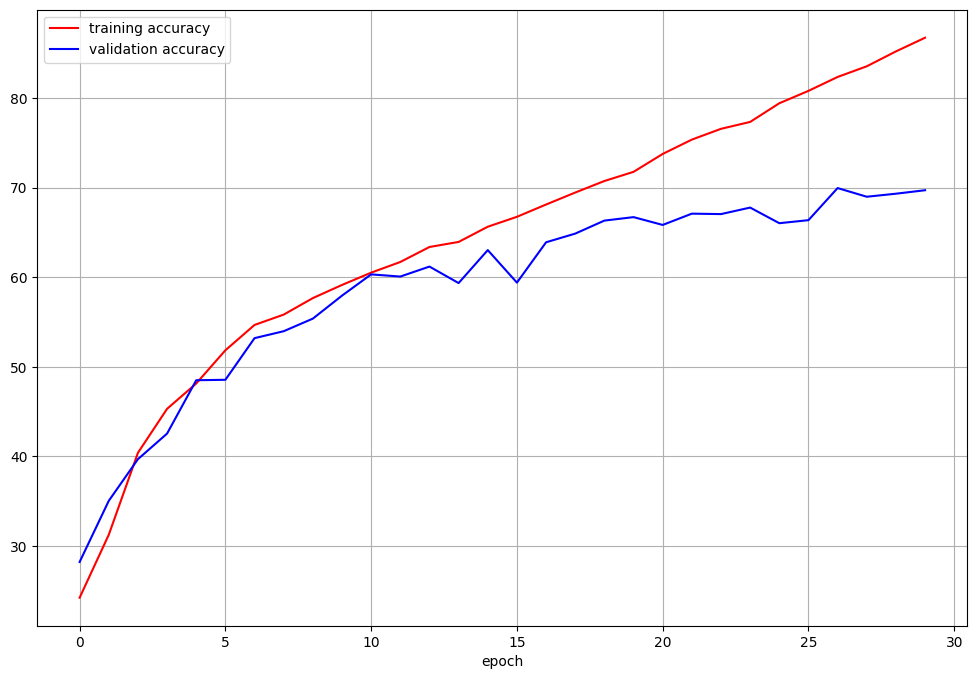

In [41]:
plt.figure(figsize=(12,8))
plt.plot(range(num_epochs),train_acc_list,"r",label="training accuracy")
plt.plot(range(num_epochs),test_acc_list,"b",label="validation accuracy")
plt.xlabel("epoch")
plt.grid(True)
plt.legend()
plt.show()

In [42]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

y_pred = []
y_true = []

net.eval() 
with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        
        outputs = net(images)
        _, predicted = torch.max(outputs, 1) 
        
        y_pred.extend(predicted.cpu().numpy())
        y_true.extend(labels.cpu().numpy())

classes = full_dataset.classes 

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Vorhergesagte Klasse (Prediction)')
plt.ylabel('Wahre Klasse (True Label)')
plt.title('Confusion Matrix: Was wird womit verwechselt?')
plt.show()

ModuleNotFoundError: No module named 'seaborn'

In [ ]:
class BetterNet(nn.Module):
    def __init__(self):
        super(BetterNet, self).__init__()
        self.drop=nn.Dropout2d(0.3)
        self.dropfc=nn.Dropout(0.3)
        self.conv1 = nn.Conv2d(channel, 64, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm2d(64)
        self.conv2 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm2d(128)
        self.conv3 = nn.Conv2d(128, 256, kernel_size=3, padding=1)
        self.bn3 = nn.BatchNorm2d(256)
        self.conv4 = nn.Conv2d(256, 512, kernel_size=3, padding=1)
        self.bn4 = nn.BatchNorm2d(512)
        self.pool = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(512*2*2, 1024)
        self.fc2 = nn.Linear(1024, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.bn1(self.drop(self.conv1(x)))))
        x = self.pool(F.relu(self.bn2(self.drop(self.conv2(x)))))
        x = self.pool(F.relu(self.bn3(self.drop(self.conv3(x)))))
        x = self.pool(F.relu(self.bn4(self.drop(self.conv4(x)))))
        x = x.view(-1, 512*2*2)
        x = F.relu(self.dropfc(self.fc1(x)))
        x = self.fc2(x)
        return x

In [ ]:
net2=BetterNet().to(device)
summary(net2,input_size=(channel, 32, 32), device=device)
print("")
#net2=Net3()

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,792
         Dropout2d-2           [-1, 64, 32, 32]               0
       BatchNorm2d-3           [-1, 64, 32, 32]             128
         MaxPool2d-4           [-1, 64, 16, 16]               0
            Conv2d-5          [-1, 128, 16, 16]          73,856
         Dropout2d-6          [-1, 128, 16, 16]               0
       BatchNorm2d-7          [-1, 128, 16, 16]             256
         MaxPool2d-8            [-1, 128, 8, 8]               0
            Conv2d-9            [-1, 256, 8, 8]         295,168
        Dropout2d-10            [-1, 256, 8, 8]               0
      BatchNorm2d-11            [-1, 256, 8, 8]             512
        MaxPool2d-12            [-1, 256, 4, 4]               0
           Conv2d-13            [-1, 512, 4, 4]       1,180,160
        Dropout2d-14            [-1, 51

In [ ]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net2.parameters(), lr=0.001)
#batch_size=128

In [ ]:
num_epochs=30
train_acc_list=[]
test_acc_list=[]
## train the model
for epoch in range(num_epochs):
    train_running_loss = 0.0
    train_acc = 0.0
    test_running_loss = 0.0
    test_acc = 0.0

    ## commence training
    #model = model.train()

    ## training step
    for i, (images, labels) in enumerate(train_loader):
        net2.train()
        images = images.to(device)
        labels = labels.to(device)

        ## forward + backprop + loss
        predictions = net2(images)
        loss = criterion(predictions, labels)
        optimizer.zero_grad()
        loss.backward()

        ## update model params
        optimizer.step()

        train_running_loss += loss.detach().item()
        train_acc += get_accuracy(predictions, labels, BS)
    
    #print(i,train_acc)
    acc_train=train_acc/i
    loss_train=train_running_loss / i
    train_acc_list.append(acc_train)
    
    for i, (images, labels) in enumerate(test_loader):
        net2.eval()
        images = images.to(device)
        labels = labels.to(device)

        ## forward + backprop + loss
        predictions = net2(images)
        loss = criterion(predictions, labels)

        test_running_loss += loss.detach().item()
        test_acc += get_accuracy(predictions, labels, BS)
    
    #print(i,train_acc)
    acc_test=test_acc/i
    loss_test=test_running_loss / i
    test_acc_list.append(acc_test)
    
    print('Epoch: %d | Train Loss: %.4f | Train Accuracy: %.2f | Val. Loss: %.4f | Val. Accuracy: %.2f' \
          %(epoch,loss_train,acc_train,loss_test,acc_test)) 

Epoch: 0 | Train Loss: 1.4686 | Train Accuracy: 39.82 | Val. Loss: 1.5843 | Val. Accuracy: 34.93
Epoch: 1 | Train Loss: 1.3039 | Train Accuracy: 48.07 | Val. Loss: 1.3792 | Val. Accuracy: 41.91
Epoch: 2 | Train Loss: 1.2533 | Train Accuracy: 50.93 | Val. Loss: 1.2858 | Val. Accuracy: 49.22
Epoch: 3 | Train Loss: 1.2151 | Train Accuracy: 52.55 | Val. Loss: 1.6536 | Val. Accuracy: 42.97
Epoch: 4 | Train Loss: 1.1671 | Train Accuracy: 56.08 | Val. Loss: 1.1927 | Val. Accuracy: 52.23
Epoch: 5 | Train Loss: 1.1304 | Train Accuracy: 56.68 | Val. Loss: 1.2919 | Val. Accuracy: 51.70
Epoch: 6 | Train Loss: 1.1138 | Train Accuracy: 58.15 | Val. Loss: 1.2171 | Val. Accuracy: 51.84
Epoch: 7 | Train Loss: 1.0852 | Train Accuracy: 58.86 | Val. Loss: 1.2652 | Val. Accuracy: 52.76
Epoch: 8 | Train Loss: 1.0534 | Train Accuracy: 60.78 | Val. Loss: 1.0451 | Val. Accuracy: 59.84
Epoch: 9 | Train Loss: 1.0326 | Train Accuracy: 61.10 | Val. Loss: 1.1057 | Val. Accuracy: 58.28
Epoch: 10 | Train Loss: 1.0032

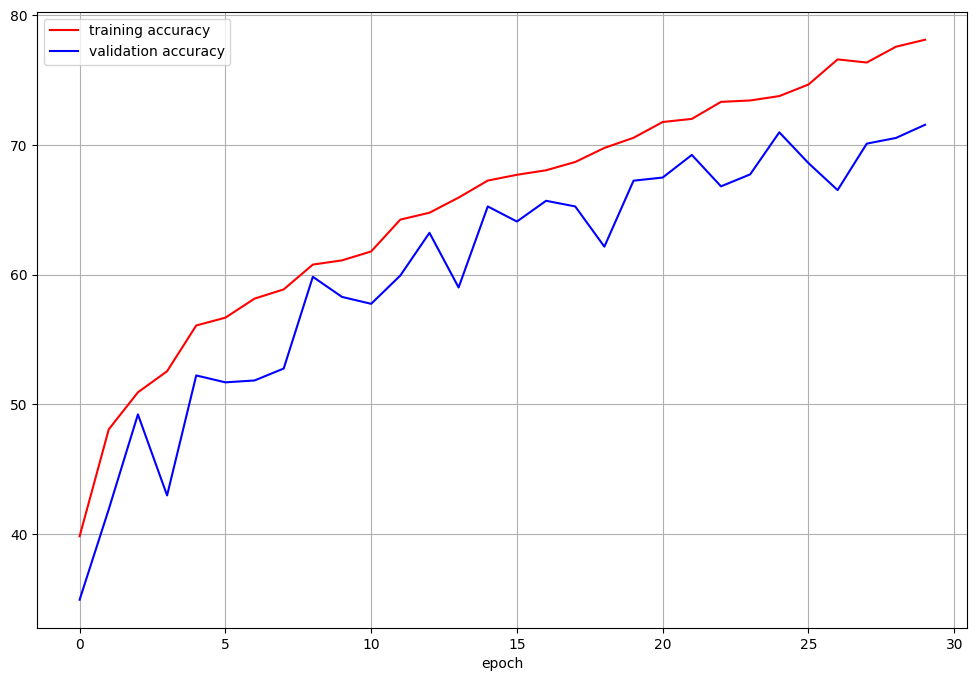

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(range(num_epochs),train_acc_list,"r",label="training accuracy")
plt.plot(range(num_epochs),test_acc_list,"b",label="validation accuracy")
plt.xlabel("epoch")
plt.grid(True)
plt.legend()
plt.show()

### Transfer Learning 

Wir nutzen das VGG16 Model 

In [21]:
model = models.vgg16(pretrained=True).to(device)
summary(model,input_size=(3,224,224))
print("")

/home/jstarkov/anaconda3/envs/sltai/lib/python3.11/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/home/jstarkov/anaconda3/envs/sltai/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 224, 224]           1,792
              ReLU-2         [-1, 64, 224, 224]               0
            Conv2d-3         [-1, 64, 224, 224]          36,928
              ReLU-4         [-1, 64, 224, 224]               0
         MaxPool2d-5         [-1, 64, 112, 112]               0
            Conv2d-6        [-1, 128, 112, 112]          73,856
              ReLU-7        [-1, 128, 112, 112]               0
            Conv2d-8        [-1, 128, 112, 112]         147,584
              ReLU-9        [-1, 128, 112, 112]               0
        MaxPool2d-10          [-1, 128, 56, 56]               0
           Conv2d-11          [-1, 256, 56, 56]         295,168
             ReLU-12          [-1, 256, 56, 56]               0
           Conv2d-13          [-1, 256, 56, 56]         590,080
             ReLU-14          [-1, 256,

In [22]:
model

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [23]:
config_modes = [
    "TRAIN_FROM_SCRATCH",
    "TRAIN_PRETRAINED",
    "TRAIN_FINETUNE",
]

In [24]:
def get_model(config_name):
    if config_name == "TRAIN_FROM_SCRATCH":
        model = models.vgg16(pretrained=False)
        for param in model.parameters():
            param.requires_grad =True
    elif config_name == "TRAIN_PRETRAINED":
        model = models.vgg16(pretrained=True)
        for param in model.parameters():
            param.requires_grad = False
    elif config_name == "TRAIN_FINETUNE":
        model = models.vgg16(pretrained=True)
        for param in model.parameters():
            param.requires_grad = True
    model.avgpool = nn.AdaptiveAvgPool2d(output_size=(1,1))
    model.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(512, 128),
        nn.ReLU(),
        nn.Dropout(0.2),
        nn.Linear(128, class_count))
    loss_fn = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr= 1e-4) 
    return model, loss_fn, optimizer

#### Training

In [25]:
model=model.to(device)

In [26]:
num_epochs=15
def run_training(config_name):
    print(f"Start training for {config_name} with {num_epochs} epochs...")
    model, criterion, optimizer = get_model(config_name)
    model = model.to(device)
    train_acc_list=[]
    test_acc_list=[]
    for epoch in range(num_epochs):
        train_running_loss = 0.0
        train_acc = 0.0
        test_running_loss = 0.0
        test_acc = 0.0
        
        ## training step
        for i, (images, labels) in enumerate(train_loader):
            model.train()
            images = images.to(device)
            labels = labels.to(device)
            
            predictions = model(images).squeeze()
            loss = criterion(predictions, labels)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            train_running_loss += loss.detach().item()
            train_acc += get_accuracy(predictions, labels, BS)
        
        acc_train=train_acc/(i+1)
        loss_train=train_running_loss/(i+1)
        train_acc_list.append(acc_train)


        model.eval()
        with torch.no_grad():
            for i, (images, labels) in enumerate(test_loader):
                images = images.to(device)
                labels = labels.to(device)
                predictions = model(images).squeeze()
                test_acc += get_accuracy(predictions, labels, BS)

        acc_test=test_acc/(i+1)
        loss_test=test_running_loss / (i+1)
        test_acc_list.append(acc_test)
        
        
        print('Epoch: %d | Train Loss: %.4f | Train Accuracy: %.2f | Val. Accuracy: %.2f' \
            %(epoch,loss_train,acc_train, acc_test)) 
    return train_acc_list, test_acc_list

### Scratch

In [27]:
train_acc_scratch, test_acc_scratch = run_training(config_modes[0])

Start training for TRAIN_FROM_SCRATCH with 15 epochs...


/home/jstarkov/anaconda3/envs/sltai/lib/python3.11/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Epoch: 0 | Train Loss: 1.5657 | Train Accuracy: 25.20 | Val. Accuracy: 30.72
Epoch: 1 | Train Loss: 1.4351 | Train Accuracy: 32.64 | Val. Accuracy: 39.33
Epoch: 2 | Train Loss: 1.3162 | Train Accuracy: 42.84 | Val. Accuracy: 44.52
Epoch: 3 | Train Loss: 1.2145 | Train Accuracy: 49.92 | Val. Accuracy: 57.31
Epoch: 4 | Train Loss: 1.1134 | Train Accuracy: 56.90 | Val. Accuracy: 60.24
Epoch: 5 | Train Loss: 1.0088 | Train Accuracy: 62.63 | Val. Accuracy: 62.60
Epoch: 6 | Train Loss: 0.8979 | Train Accuracy: 66.45 | Val. Accuracy: 54.62
Epoch: 7 | Train Loss: 0.8173 | Train Accuracy: 69.89 | Val. Accuracy: 64.38
Epoch: 8 | Train Loss: 0.7526 | Train Accuracy: 72.38 | Val. Accuracy: 67.93
Epoch: 9 | Train Loss: 0.6565 | Train Accuracy: 76.32 | Val. Accuracy: 69.38
Epoch: 10 | Train Loss: 0.5753 | Train Accuracy: 79.90 | Val. Accuracy: 70.24
Epoch: 11 | Train Loss: 0.4847 | Train Accuracy: 82.92 | Val. Accuracy: 69.57
Epoch: 12 | Train Loss: 0.4419 | Train Accuracy: 84.22 | Val. Accuracy: 70

### Pretrained

In [28]:
train_acc_pretrained, test_acc_pretrained = run_training(config_modes[1])

Start training for TRAIN_PRETRAINED with 15 epochs...
Epoch: 0 | Train Loss: 1.3550 | Train Accuracy: 47.54 | Val. Accuracy: 56.44
Epoch: 1 | Train Loss: 1.0898 | Train Accuracy: 59.40 | Val. Accuracy: 59.33
Epoch: 2 | Train Loss: 1.0023 | Train Accuracy: 62.30 | Val. Accuracy: 61.49
Epoch: 3 | Train Loss: 0.9513 | Train Accuracy: 64.07 | Val. Accuracy: 62.74
Epoch: 4 | Train Loss: 0.9140 | Train Accuracy: 65.50 | Val. Accuracy: 63.51
Epoch: 5 | Train Loss: 0.8849 | Train Accuracy: 66.35 | Val. Accuracy: 63.56
Epoch: 6 | Train Loss: 0.8613 | Train Accuracy: 67.97 | Val. Accuracy: 63.94
Epoch: 7 | Train Loss: 0.8402 | Train Accuracy: 68.59 | Val. Accuracy: 64.71
Epoch: 8 | Train Loss: 0.8228 | Train Accuracy: 69.39 | Val. Accuracy: 65.14
Epoch: 9 | Train Loss: 0.8041 | Train Accuracy: 70.16 | Val. Accuracy: 64.90
Epoch: 10 | Train Loss: 0.7863 | Train Accuracy: 71.06 | Val. Accuracy: 64.95
Epoch: 11 | Train Loss: 0.7727 | Train Accuracy: 71.80 | Val. Accuracy: 65.58
Epoch: 12 | Train Lo

### Finetuned

In [29]:
train_acc_finetuned, test_acc_finetuned = run_training(config_modes[2])

Start training for TRAIN_FINETUNE with 15 epochs...
Epoch: 0 | Train Loss: 0.9503 | Train Accuracy: 64.38 | Val. Accuracy: 74.76
Epoch: 1 | Train Loss: 0.5555 | Train Accuracy: 80.52 | Val. Accuracy: 79.90
Epoch: 2 | Train Loss: 0.3783 | Train Accuracy: 87.08 | Val. Accuracy: 83.37
Epoch: 3 | Train Loss: 0.2531 | Train Accuracy: 91.42 | Val. Accuracy: 83.46
Epoch: 4 | Train Loss: 0.1758 | Train Accuracy: 94.11 | Val. Accuracy: 81.97
Epoch: 5 | Train Loss: 0.1208 | Train Accuracy: 96.01 | Val. Accuracy: 81.11
Epoch: 6 | Train Loss: 0.0951 | Train Accuracy: 96.80 | Val. Accuracy: 78.22
Epoch: 7 | Train Loss: 0.0939 | Train Accuracy: 96.90 | Val. Accuracy: 82.88
Epoch: 8 | Train Loss: 0.0735 | Train Accuracy: 97.74 | Val. Accuracy: 84.33
Epoch: 9 | Train Loss: 0.0693 | Train Accuracy: 97.85 | Val. Accuracy: 82.98
Epoch: 10 | Train Loss: 0.0593 | Train Accuracy: 98.09 | Val. Accuracy: 80.24
Epoch: 11 | Train Loss: 0.0490 | Train Accuracy: 98.46 | Val. Accuracy: 83.99
Epoch: 12 | Train Loss

/tmp/ipykernel_60568/1277776214.py:26: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels(['{:.1f}%'.format(x) for x in plt.gca().get_yticks()])


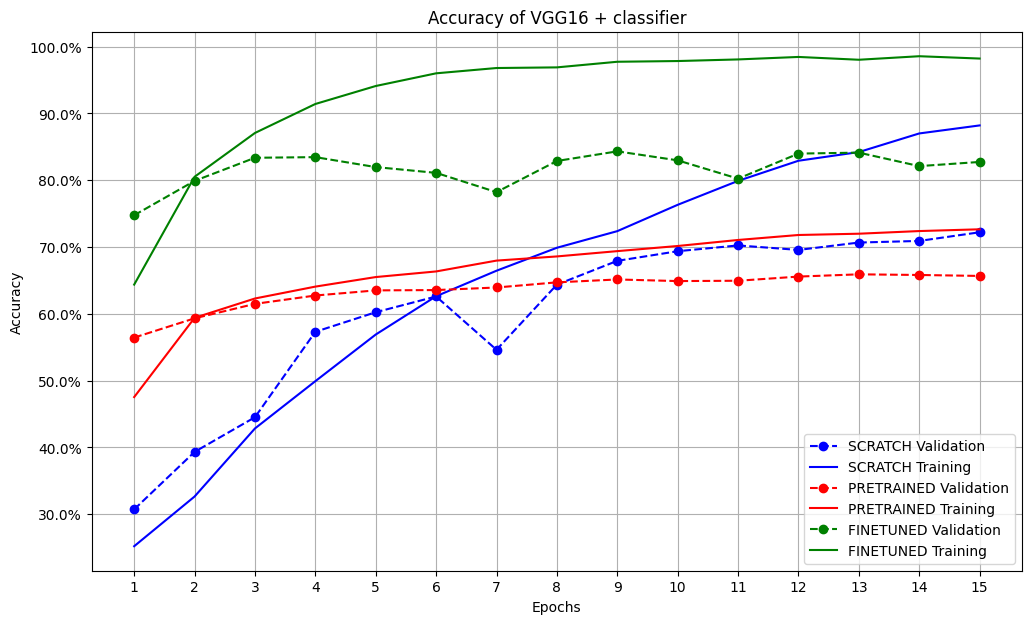

In [30]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import numpy as np

epochs = np.arange(num_epochs) + 1

plt.figure(figsize=(12, 7))

# --- 1. SCRATCH (Blau) ---
plt.plot(epochs, test_acc_scratch, 'bo--', label='SCRATCH Validation')
plt.plot(epochs, train_acc_scratch, 'b-', label='SCRATCH Training')

# --- 2. PRETRAINED (Rot) ---
plt.plot(epochs, test_acc_pretrained, 'ro--', label='PRETRAINED Validation')
plt.plot(epochs, train_acc_pretrained, 'r-', label='PRETRAINED Training')

# --- 3. FINETUNED (Grün) ---
plt.plot(epochs, test_acc_finetuned, 'go--', label='FINETUNED Validation')
plt.plot(epochs, train_acc_finetuned, 'g-', label='FINETUNED Training')

plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
plt.title(f'Accuracy of VGG16 + classifier')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.gca().set_yticklabels(['{:.1f}%'.format(x) for x in plt.gca().get_yticks()])

plt.legend()
plt.grid('off') 
plt.show()

### Quellen <a id="quellen"></a>

[1] ALBA und Civey, "Gut gemeint: Große Mehrheit trennt den Müll und schadet dennoch dem Klima", Pressemitteilung, 20.07.2022. (Online). Verfügbar: https://www.alba.info/unternehmen/newsroom/pressemitteilungen/detail/gut-gemeint-grosse-mehrheit-trennt-den-muell-und-schadet-dennoch-dem-klima/. (Zugriff: 10.01.2026).

[2] L. Löwe, "Alles durcheinander: Die Unlust beim Mülltrennen", FR.de, 10.01.2019. (Online). Verfügbar: https://www.fr.de/ratgeber/wohnen/alles-durcheinander-unlust-beim-muelltrennen-11106084.html. (Zugriff: 15.01.2026). 